## 標準神經網路做手寫辨識提升準確率作業

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

Using TensorFlow backend.


讀入MNIST

In [0]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [0]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras.optimizers import SGD

In [0]:
NNmodel = Sequential()

In [9]:
NNmodel.add(Dense(600, input_dim=784))
NNmodel.add(Activation('tanh'))
NNmodel.add(Dense(300))
NNmodel.add(Activation('tanh'))
NNmodel.add(Dense(100))
NNmodel.add(Activation('tanh'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
NNmodel.add(Dense(10))
NNmodel.add(Activation('softmax'))

In [12]:
NNmodel.compile(loss='mse', optimizer=SGD(lr=0.09), metrics=['accuracy'])
NNmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 600)               471000    
_________________________________________________________________
activation_1 (Activation)    (None, 600)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               180300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
__________

In [13]:
NNmodel.fit(x_train, y_train, batch_size=100, epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
60000/60000 [==============================] - 9s 146us/step - loss: 0.0362 - acc: 0.7590
Epoch 2/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0172 - acc: 0.8957
Epoch 3/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0139 - acc: 0.9145
Epoch 4/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0122 - acc: 0.9252
Epoch 5/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0110 - acc: 0.9328
Epoch 6/30
60000/60000 [==============================] - 8s 131us/step - loss: 0.0099 - acc: 0.9388
Epoch 7/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0092 - acc: 0.9436
Epoch 8/30
60000/60000 [==============================] - 8s 132us/step - loss: 0.0086 - acc: 0.9465
Epoch 9/30
60000/60000 [==============================] - 8s 131us/step - loss: 0.0081 - acc: 0.9501
Epoch 10/30
60000/60000 [==================

In [14]:
score = NNmodel.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 1s 80us/step
loss: 0.005877398982041632
正確率 0.9628


In [0]:
from ipywidgets import interact_manual

In [16]:
predict = NNmodel.predict_classes(x_test)
predict

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

神經網路判斷為: 4


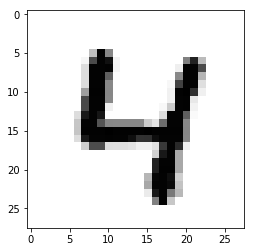

In [18]:
test(56)

神經網路判斷為: 7


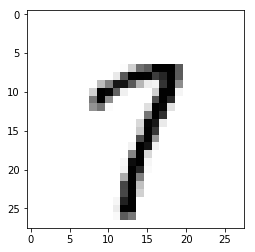

In [19]:
test(666)